In [1]:
get_ipython().magic(u'matplotlib inline')
import matplotlib.pyplot as plt

### A Simple Model of Mass Partitioning and BioDegredation
#### Koshlan Mayer-Blackwell

#### Declaration of Fixed System Variables

In [2]:
V_total  = 1                    # Volume in Liters  
V_liquid = 0.4                  # Volume in Liters
V_liquid_max = 0.4
V_gas = V_total - V_liquid        # Volume in Liters
 
Q = 0.024                      # Flow Rate L/Day

# Henry's Partition Constant Dimensionless Cgas/Caqeous
K_h_TCE = 0.42 
K_h_DCE = 0.166 
K_h_VC  = 1.11
K_H_DCA = 0.04
K_h_H   = 52.4                   # Hyrdogen Henry's Partition Constant Dimensionless Cgas/Caqeous
 
# STARTING CONENTRATIONS EVERYTHING IS IN uMolar
C_liquid_TCE = 100
C_liquid_DCE = 100
C_liquid_VC = 100 
C_liquid_DCA = 0
C_liquid_H = 45

C_gas_TCE = 0
C_gas_DCE = 0
C_gas_VC = 0
C_gas_DCA = 0
C_gas_H = 0

X1 = 10                         #[mg protein/ L];
X2 = 10

# INFLUENT CONCENTRATION (ASSUME STABLE)
C_in_TCE = 10000
C_in_DCE = 0
C_in_VC  = 0
C_in_CA = 0
C_in_H = 30000

#### Organism 1 <i>containing the tceA gene for TCE reductive dehalogenase</i>

In [3]:
# Population 1 SPECIFIC CONSTANTS tceA containing Dehalococcoides
vTCE_1  = 28              # [uMol/mg/day]   # Vmax TCE, Population 1
vDCE_1  = 14                 # [uMol/mg/day]   # Vmax DCE, Population 1
vVC_1   = 0                 # [uMol/mg/day]   # Vmax VC, Population 1
vDCA_1  = 0
kTCE_1  = 1.8               # [uM]            # Ks,TCE Population 1
kDCE_1  = 1.8               # [uM]            # Ks,DCE Population 1
kVC_1   = 6.3               # [uM]            # Ks,VC  Population 1
kDCA_1  = 6.3
kH_1    = 1.8
KI_TCE_1= 1.8               # [uM]            # KI,TCE, Population 1
KI_DCE_1= 1.8               # [uM]            # KI,DCE, Population 1
Y_TCE_1 = 0.006             # Yield, TCE Population 1
Y_DCE_1 = 0.006             # [mg pro./uMol substrate]    # Yield, TCE Population 1
Y_VC_1  = 0.006             # [mg pro./uMol substrate]    #Yield, VC Populations 1
Y_DCA_1 = 0.006
Decay_1 = 0.025             # [day^-1 ]       # rate of natural decay 
H_thr_1 = 0.01 

#### Organism 2 <i>containing the vcrA gene for vinyl chloride reductive dehalogenase</i>

In [4]:
# Population 2 SPECIFIC CONSTANTS vcrA containing Dehalococcoides
vTCE_2  = 1             # [uMol/mg/day]   # Vmax TCE, Population 2
vDCE_2  = 14                # [uMol/mg/day]   # Vmax DCE, Population 2
vVC_2   = 14                 # [uMol/mg/day]   # Vmax VC, Population 2
vDCA_2  = 0
kTCE_2  = 1.8               # [uM]            # Ks,TCE Population 2
kDCE_2  = 1.8               # [uM]            # Ks,DCE Population 2
kVC_2   = 6.3               # [uM]            # Ks,VC  Population 2
kDCA_2  = 6.3
kH_2    = 1.8
KI_TCE_2= 1.8               # [uM]            # KI,TCE, Population 2
KI_DCE_2= 1.8               # [uM]            # KI,DCE, Population 2
Y_TCE_2 = 0.006             # Yield, TCE Population 2
Y_DCE_2 = 0.006             # [mg pro./uMol substrate]    # Yield, TCE Population 2
Y_VC_2  = 0.006             # [mg pro./uMol substrate]    #Yield, VC Populations 1
Y_DCA_2 = 0.006
Decay_2 = 0.025             # [day^-1 ]       # rate of natural decay 
H_thr_2 = 0.01 


#### NUMERICAL LOOP


In [5]:

storage = {'counter':[],
           'X1':[],
           'X2':[],
           'C_liquid_TCE':[],
           'C_liquid_DCE':[],
           'C_liquid_VC':[],
           'C_liquid_DCA':[],
           'C_liquid_H':[],
           'C_gas_TCE':[],
           'C_gas_DCE':[],
           'C_gas_VC':[],
           'C_gas_DCA':[],
           'C_gas_H':[],
           'dTCE_1':[], 
           'dDCE_1':[], 
           'dVC_1':[], 
           'dDCA_1':[], 
           'dTCE_2':[], 
           'dDCE_2':[], 
           'dVC_2':[], 
           'dDCA_2':[]}



DT = 0.001                       # Timestep Fraction Days
n = 200000                  # Number of Steps
for i in range(n):
    # BLOCK HANDLES INPUT OF SUBSTRATE AND EQUILIBRATION OF GAS AND LIQUID
    ###########
    ### TCE ###
    ###########
    M_gas_TCE = C_gas_TCE * V_gas
    M_liquid_TCE = C_liquid_TCE * V_liquid
    M_total_TCE =  M_gas_TCE + M_liquid_TCE                 # CALCULATE TOTAL MASS FROM PREVIOUS
    M_total_TCE += (C_in_TCE * Q * DT)                      # UPDATE TOTAL MASS WITH ADDITION
    C_liquid_TCE = M_total_TCE / (K_h_TCE*V_gas + V_liquid) # PARTITION uMol/L
    C_gas_TCE = K_h_TCE * C_liquid_TCE                      # PARTITION uMol/L
    M_liquid_TCE = C_liquid_TCE * V_liquid                  # UPDATE TOTAL MASS IN LIQUID WITH ADDITION
    M_gas_TCE = C_gas_TCE * V_gas                           # UPDATE TOTAL MASS IN GAS WITH ADDITION
    ###########
    ### DCE ###
    ###########
    M_gas_DCE = C_gas_DCE * V_gas
    M_liquid_DCE = C_liquid_DCE * V_liquid
    M_total_DCE =  M_gas_DCE + M_liquid_DCE                 # CALCULATE TOTAL MASS FROM PREVIOUS
    M_total_DCE += (C_in_DCE * Q * DT)                      # UPDATE TOTAL MASS WITH ADDITION
    C_liquid_DCE = M_total_DCE / (K_h_DCE*V_gas + V_liquid) # PARTITION uMol/L
    C_gas_DCE = K_h_DCE * C_liquid_DCE                      # PARTITION uMol/L
    M_liquid_DCE = C_liquid_DCE * V_liquid                  # UPDATE TOTAL MASS IN LIQUID WITH ADDITION
    M_gas_DCE = C_gas_DCE * V_gas                           # UPDATE TOTAL MASS IN GAS WITH ADDITION
    ###########
    ### VC ###
    ###########
    M_gas_VC = C_gas_VC * V_gas
    M_liquid_VC = C_liquid_VC * V_liquid
    M_total_VC =  M_gas_VC + M_liquid_VC                 # CALCULATE TOTAL MASS FROM PREVIOUS
    M_total_VC += (C_in_VC * Q * DT)                      # UPDATE TOTAL MASS WITH ADDITION
    C_liquid_VC = M_total_VC / (K_h_VC*V_gas + V_liquid) # PARTITION uMol/L
    C_gas_VC = K_h_VC * C_liquid_VC                      # PARTITION uMol/L
    M_liquid_VC = C_liquid_VC * V_liquid                  # UPDATE TOTAL MASS IN LIQUID WITH ADDITION
    M_gas_VC = C_gas_VC * V_gas                           # UPDATE TOTAL MASS IN GAS WITH ADDITION    
    
    ##########
    ### H2 ###
    ##########
    M_gas_H = C_gas_H * V_gas
    M_liquid_H = C_liquid_H * V_liquid
    M_total_H =  M_gas_H + M_liquid_H                 	# CALCULATE TOTAL MASS FROM PREVIOUS
    M_total_H += (C_in_H * Q * DT)                      # UPDATE TOTAL MASS WITH ADDITION
    C_liquid_H = M_total_H / (K_h_H*V_gas + V_liquid) 	# PARTITION uMol/L
    C_gas_H = K_h_H * C_liquid_H                      	# PARTITION uMol/L
    M_liquid_H = C_liquid_H * V_liquid                  # UPDATE TOTAL MASS IN LIQUID WITH ADDITION
    M_gas_H = C_gas_H * V_gas                           # UPDATE TOTAL MASS IN GAS WITH ADDITION
      
    # REDUCTION TAKES PLACE IN THE FORM OF MICROBIAL CONSUMPTION
    # REDUCTION TAKES PLACE IN TERMS OF MASS LEAVING THE SYSTEM FROM THE LIQUID ONLY
    # RATES
    
    dTCE_1  = (X1 * vTCE_1 *  (C_liquid_TCE / ( kTCE_1 + C_liquid_TCE))																*  (C_liquid_H-H_thr_1) / ((C_liquid_H-H_thr_1) + kH_1 ))
    dDCE_1  = (X1 * vDCE_1 *  (C_liquid_DCE / ( kDCE_1 * (1 + (C_liquid_TCE/KI_TCE_1)) 							+ C_liquid_DCE))	*  (C_liquid_H-H_thr_1) / ((C_liquid_H-H_thr_1) + kH_1 ))
    dVC_1   = (X1 * vVC_1  *  (C_liquid_VC  / ( kVC_1  * (1 + (C_liquid_TCE/KI_TCE_1)+(C_liquid_DCE/KI_DCE_1)) 	+ C_liquid_VC))  	*  (C_liquid_H-H_thr_1) / ((C_liquid_H-H_thr_1) + kH_1 ))
    dDCA_1  = (X1 * vDCA_1 *  (C_liquid_DCA / ( kDCA_1 + C_liquid_DCA))                                       						*  (C_liquid_H-H_thr_1) / ((C_liquid_H-H_thr_1) + kH_1 ))
    dH_1 = dTCE_1 + dDCE_1 + dVC_1 + dDCA_1
    
    dTCE_2  = (X2 * vTCE_2 *  (C_liquid_TCE / ( kTCE_2 + C_liquid_TCE))																*  (C_liquid_H-H_thr_2) / ((C_liquid_H-H_thr_2) + kH_2 ))
    dDCE_2  = (X2 * vDCE_2 *  (C_liquid_DCE / ( kDCE_2 * (2 + (C_liquid_TCE/KI_TCE_2)) 							+ C_liquid_DCE))	*  (C_liquid_H-H_thr_2) / ((C_liquid_H-H_thr_2) + kH_2 ))
    dVC_2   = (X2 * vVC_2  *  (C_liquid_VC  / ( kVC_2  * (2 + (C_liquid_TCE/KI_TCE_2)+(C_liquid_DCE/KI_DCE_2)) 	+ C_liquid_VC))  	*  (C_liquid_H-H_thr_2) / ((C_liquid_H-H_thr_2) + kH_2 ))
    dDCA_2  = (X2 * vDCA_2 *  (C_liquid_DCA / ( kDCA_2 + C_liquid_DCA))                                       						*  (C_liquid_H-H_thr_2) / ((C_liquid_H-H_thr_2) + kH_2 ))
    dH_2 = dTCE_2 + dDCE_2 + dVC_2 + dDCA_2
    
    
    # MASS REDUCTIONS #
    M_liquid_TCE -= DT * (dTCE_1 + dTCE_2 + (C_liquid_TCE * Q)) # uMol removed each timestep
    M_liquid_DCE -= DT * (dDCE_1 + dDCE_2 + (C_liquid_DCE * Q) - dTCE_1 - dTCE_2 )
    M_liquid_VC  -= DT * (dVC_1 + dVC_2 + (C_liquid_VC * Q)    - dDCE_1 - dDCE_2 )
    M_liquid_H   -= DT * (dH_1 + dH_1 + (C_liquid_H * Q)) # uMol removed each timestep
        
    # LIQUID CONCENTRATION AFTER REDUCTION
    C_liquid_TCE = M_liquid_TCE / V_liquid
    C_liquid_DCE = M_liquid_DCE / V_liquid
    C_liquid_VC  = M_liquid_VC  / V_liquid
    C_liquid_H   = M_liquid_H   / V_liquid
   
    # ENFORCE NON-ZERO CONDITION
    if C_liquid_TCE < 0:
        C_liquid_TCE = 0.001
    if C_liquid_DCE < 0:
        C_liquid_DCE = 0.001
    if C_liquid_VC  < 0:
        C_liquid_VC  = 0.001
    if C_liquid_H < 0:
        C_liquid_H = 0.001
    
    
    #####################
    ### X1, X2 Growth ###
    #####################
    M_X1 = V_liquid * X1
    M_X2 = V_liquid * X2
    
    M_X1 += DT*(dTCE_1*Y_TCE_1 + dDCE_1*Y_DCE_1 + dVC_1*Y_VC_1 - (X1 * Q) -  (Decay_1*X1))
    M_X2 += DT*(dTCE_2*Y_TCE_2 + dDCE_2*Y_DCE_2 + dVC_2*Y_VC_2 - (X2 * Q) -  (Decay_2*X2))
    X1 = M_X1 / V_liquid
    X2 = M_X2 / V_liquid
    
    #print X1
    
    # THIS BLOCK OF CODE IS ENTIRELY CONCERNED WITH STORING THE DATA FOR FUTURE USE
    if i % 1000 == 0:
        storage["C_gas_DCA"].append(C_gas_DCA)
        storage["C_gas_DCE"].append(C_gas_DCE)
        storage["C_gas_H"].append(C_gas_H)
        storage["C_gas_TCE"].append(C_gas_TCE)
        storage["C_gas_VC"].append(C_gas_VC)
        storage["C_liquid_DCA"].append(C_liquid_DCA)
        storage["C_liquid_DCE"].append(C_liquid_DCE)
        storage["C_liquid_H"].append(C_liquid_H)
        storage["C_liquid_TCE"].append(C_liquid_TCE)
        storage["C_liquid_VC"].append(C_liquid_VC)
        storage["X1"].append(X1)
        storage["X2"].append(X2)
        storage["counter"].append(i)
        storage["dDCA_1"].append(dDCA_1)
        storage["dDCA_2"].append(dDCA_2)
        storage["dDCE_1"].append(dDCE_1)
        storage["dDCE_2"].append(dDCE_2)
        storage["dTCE_1"].append(dTCE_1)
        storage["dTCE_2"].append(dTCE_2)
        storage["dVC_1"].append(dVC_1)
        storage["dVC_2"].append(dVC_2)


days = [x/1000 for x in storage["counter"]]


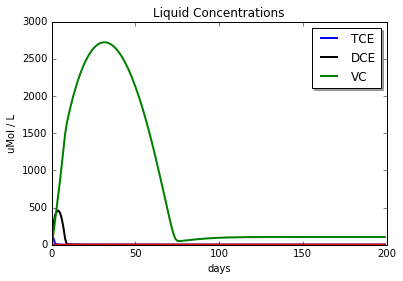

In [6]:
x1, = plt.plot(days,storage['C_liquid_TCE'], '-', linewidth=2, c ="blue")
x2, = plt.plot(days,storage['C_liquid_DCE'], '-', linewidth=2, c = "black")
x3, = plt.plot(days,storage['C_liquid_VC'], '-', linewidth=2, c = "green")
plt.plot(days,storage['C_liquid_H'], '-', linewidth=2 ,c= "red")
plt.title('Liquid Concentrations')
plt.ylabel('uMol / L')
plt.xlabel('days')
plt.legend( (x1, x2,x3), ('TCE', 'DCE','VC'), loc='upper right', shadow=True)

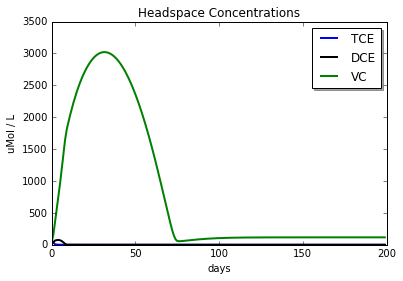

In [7]:
x1, = plt.plot(days,storage['C_gas_TCE'], '-', linewidth=2, c ="blue")
x2, = plt.plot(days,storage['C_gas_DCE'], '-', linewidth=2, c = "black")
x3, = plt.plot(days,storage['C_gas_VC'], '-', linewidth=2, c = "green")
#plt.plot(days,storage['C_gas_H'], '-', linewidth=2 ,c= "red")
plt.title('Headspace Concentrations')
plt.ylabel('uMol / L')
plt.xlabel('days')
plt.legend( (x1, x2,x3), ('TCE', 'DCE','VC'), loc='upper right', shadow=True)

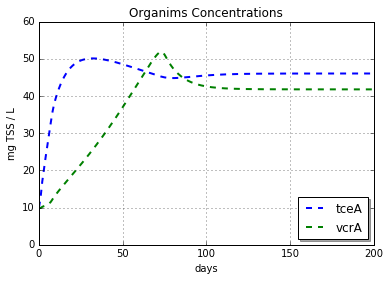

In [8]:
x1, = plt.plot(days,storage['X1'], '--', linewidth=2)
x2, = plt.plot(days,storage['X2'], '--', linewidth=2, c ="green")
plt.title('Organims Concentrations')
plt.ylabel('mg TSS / L')
plt.xlabel('days')
plt.legend( (x1, x2), ('tceA', 'vcrA'), loc='lower right', shadow=True)
plt.grid(True)
